In [3]:
import os
import pathlib
import pandas as pd
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

In [4]:
!pip install ktrain
import ktrain
from ktrain import text
MODEL_NAME="Musixmatch/umberto-wikipedia-uncased-v1"

  Using cached ktrain-0.28.2-py3-none-any.whl
  Using cached seqeval-0.0.19.tar.gz (30 kB)
  Using cached syntok-1.3.1.tar.gz (23 kB)
  Using cached langdetect-1.0.9.tar.gz (981 kB)
  Using cached keras-bert-0.88.0.tar.gz (26 kB)
  Using cached Whoosh-2.7.4-py2.py3-none-any.whl (468 kB)
  Using cached cchardet-2.1.7-cp37-cp37m-manylinux2010_x86_64.whl (263 kB)
  Using cached keras-transformer-0.39.0.tar.gz (11 kB)
  Using cached keras-pos-embd-0.12.0.tar.gz (6.0 kB)
  Using cached keras-multi-head-0.28.0.tar.gz (14 kB)
  Using cached keras-layer-normalization-0.15.0.tar.gz (4.2 kB)
  Using cached keras-position-wise-feed-forward-0.7.0.tar.gz (4.5 kB)
  Using cached keras-embed-sim-0.9.0.tar.gz (4.1 kB)
  Using cached keras-self-attention-0.50.0.tar.gz (12 kB)
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9929 sha256=ec5034d5ce2d17f89ba0766276cbf3dec365a2a0a80fc3563ea7070872c33e9a
  Stored in directory: /root/.cache/pip/wheels/f5/ac/f1/4e13d7aff05c722d142b7d

In [5]:
train_path= "../input/dati-di-training-e-di-test/haspeede2_dev_taskAB.csv"
test_path="../input/dati-di-training-e-di-test/haspeede2_reference_taskAB(misto).csv"
tr_path=pathlib.Path(train_path)
te_path=pathlib.Path(test_path)
if tr_path.exists():
    print("Train data path set.")
else:
    raise SystemExit("Training Data Path does not exist.")

if te_path.exists():
    print("Test data path set.")
else:
    raise SystemExit("Test Data Path does not exist.")

Train data path set.
Test data path set.


In [6]:
train_df= pd.read_csv(train_path, encoding='utf-8', sep="\t", header=None)
train_df=train_df.drop([0])
train_df=train_df.drop([3], axis=1)
train_df.head()

,0,1,2
1,2066,"È terrorismo anche questo, per mettere in uno ...",0
2,2045,@user @user infatti finché ci hanno guadagnato...,0
3,61,"Corriere: Tangenti, Mafia Capitale dimenticata...",0
4,1259,"@user ad uno ad uno, perché quando i migranti ...",0
5,949,Il divertimento del giorno? Trovare i patrioti...,0


In [7]:
test_df= pd.read_csv(test_path, encoding='utf-8', sep=";",header=None)
test_df=test_df.drop([3], axis=1)
test_df.head()

,0,1,2
0,11834,@user A me pare una scelta politica suicida pu...,1
1,12113,@user e' un perfetto musulmano!!! chi dice il ...,1
2,11770,Mai Tg e i giornaloni hanno parlato di questa ...,1
3,11937,@user Ipocriti farabutti. Fanno morire i terre...,1
4,11870,@user @user @user L'IMMIGRAZIONE C'E' STATO UN...,1


In [8]:
x_train=train_df[1].tolist()
y_train=train_df[2].tolist()
x_test=test_df[1].tolist()
y_test=test_df[2].tolist()


t=text.Transformer(MODEL_NAME,maxlen=100)
trn=t.preprocess_train(x_train,y_train)
val=t.preprocess_test(x_test,y_test)

Downloading:   0%|          | 0.00/508 [00:00<?, ?B/s]

preprocessing train...
language: it
train sequence lengths:
	mean : 23
	95percentile : 45
	99percentile : 50


Downloading:   0%|          | 0.00/801k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.02M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/210 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/309 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: it
test sequence lengths:
	mean : 29
	95percentile : 48
	99percentile : 53


404 Client Error: Not Found for url: https://huggingface.co/Musixmatch/umberto-wikipedia-uncased-v1/resolve/main/tf_model.h5
/opt/conda/lib/python3.7/site-packages/ktrain/text/preprocessor.py:1067: UserWarning: Could not find Tensorflow version of model.  Attempting to download/load PyTorch version as TensorFlow model using from_pt=True. You will need PyTorch installed for this.
  warnings.warn('Could not find Tensorflow version of model.  Attempting to download/load PyTorch version as TensorFlow model using from_pt=True. ' +\


Downloading:   0%|          | 0.00/445M [00:00<?, ?B/s]

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
213/213 [==============================] - 102s 383ms/step - loss: 0.6966 - accuracy: 0.4655
Epoch 2/10
213/213 [==============================] - 83s 390ms/step - loss: 0.6748 - accuracy: 0.5969
Epoch 3/10
213/213 [==============================] - 83s 390ms/step - loss: 0.5623 - accuracy: 0.7023
Epoch 4/10
213/213 [==============================] - 83s 389ms/step - loss: 0.5103 - accuracy: 0.7433
Epoch 5/10
213/213 [==============================] - 83s 389ms/step - loss: 0.6311 - accuracy: 0.6460
Epoch 6/10
213/213 [==============================] - 83s 389ms/step - loss: 0.6869 - accuracy: 0.5721
Epoch 7/10
213/213 [==============================] - 74s 346ms/step - loss: 3.0027 - accuracy: 0.5337


done.
Visually inspect loss plot and select learning rate associated with falling loss


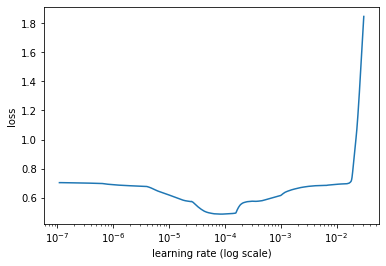



begin training using triangular learning rate policy with max lr of 0.0002...
Epoch 1/10
214/214 [==============================] - 109s 435ms/step - loss: 0.5915 - accuracy: 0.6712 - val_loss: 0.5917 - val_accuracy: 0.7158
Epoch 2/10
214/214 [==============================] - 92s 424ms/step - loss: 0.5656 - accuracy: 0.7031 - val_loss: 0.6866 - val_accuracy: 0.5445
Epoch 3/10
214/214 [==============================] - 92s 424ms/step - loss: 0.6613 - accuracy: 0.6164 - val_loss: 0.7011 - val_accuracy: 0.5445
Epoch 4/10
214/214 [==============================] - 92s 424ms/step - loss: 0.6771 - accuracy: 0.5953 - val_loss: 0.6975 - val_accuracy: 0.5445
Epoch 5/10
214/214 [==============================] - 92s 423ms/step - loss: 0.6767 - accuracy: 0.5954 - val_loss: 0.6922 - val_accuracy: 0.5445
Epoch 6/10
214/214 [==============================] - 92s 422ms/step - loss: 0.6765 - accuracy: 0.5916 - val_loss: 0.6982 - val_accuracy: 0.5445
Restoring model weights from the end of the best 

array([[780, 180],
       [321, 482]])

In [9]:
model=t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=32)

learner.lr_find(show_plot=True,max_epochs=10)
learner.autofit(2e-4,early_stopping=5,epochs=10)
learner.validate(class_names=t.get_classes())

In [10]:
predictor = ktrain.get_predictor(learner.model, preproc=t)

data=test_df[1].tolist()
label=test_df[2].tolist()

i = 0
correct = 0
wrong = 0
total = len(data)
true_lab = []
pred_lab = []
text = []
for dt in data:
    result = predictor.predict(dt)
    if not int(result) == label[i]:
        text.append(dt)
        pred_lab.append(result)
        true_lab.append(label[i])
        wrong += 1
    else:
        correct += 1

    i += 1

name_dict = {
    'Name': text,
    'Gold Label': true_lab,
    'Predicted Label': pred_lab
}

wrong_data = pd.DataFrame(name_dict)

wrong_data.to_csv("wrong_results.csv", sep=';')

print("Correct: ", correct,"/",total,"\nWrong: ", wrong,"/",total)

Correct:  1262 / 1763 
Wrong:  501 / 1763
